In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ds=pd.read_csv('Volume_price.csv')
ds.head()

,Volume,Price
0,10,393.10
1,11,471.91
2,14,751.66
3,16,974.26
4,17,1096.39


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Volume  23 non-null     int64  
 1   Price   23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


In [4]:
#x=ds.iloc[:,:-1].values #Volume
#x=ds.iloc[:,0:3].values #Volume
#x=ds.iloc[:,[0,1,2,3]].values 
#y=ds.iloc[:,4].values #Price
#=ds.iloc[:,-1].values #Volume
#print(x)
#print(y)

In [6]:
x=ds.iloc[:,:-1].values 
y=ds.iloc[:,1].values

In [6]:
#Handling or Encode categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_x = LabelEncoder()
x[:, 3] = labelencoder_x.fit_transform(x[:, 3])

ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
x = ct.fit_transform(x)
print(x)

[[1.0 0.0 101184 70674 97009]
 [0.0 1.0 70132 52030 63587]
 [1.0 0.0 149539 98535 199994]
 [0.0 1.0 75821 53649 66500]
 [0.0 1.0 97730 68667 91754]
 [0.0 1.0 84544 60923 81618]
 [1.0 0.0 117490 85379 146277]
 [0.0 1.0 119913 86499 150579]
 [0.0 1.0 145244 95108 189066]
 [1.0 0.0 147217 95598 190309]
 [0.0 1.0 81746 56815 72351]
 [1.0 0.0 107967 74058 106215]
 [1.0 0.0 74692 52493 64267]
 [1.0 0.0 72228 52210 63719]
 [0.0 1.0 96292 68521 90007]
 [1.0 0.0 124506 86995 153382]
 [0.0 1.0 113543 82796 122345]
 [1.0 0.0 142585 94589 184603]
 [1.0 0.0 118057 86227 146948]
 [1.0 0.0 86260 63082 85320]
 [1.0 0.0 63601 51026 59932]
 [1.0 0.0 113200 76388 115984]
 [0.0 1.0 141331 93725 171453]
 [1.0 0.0 79667 54864 69102]
 [0.0 1.0 112208 75407 115316]
 [1.0 0.0 82622 59754 72987]
 [0.0 1.0 127721 88888 153477]
 [0.0 1.0 117901 85532 146822]
 [0.0 1.0 147364 96275 191812]
 [1.0 0.0 110661 75404 114864]
 [0.0 1.0 107360 73604 100773]
 [0.0 1.0 87194 63403 87468]
 [1.0 0.0 75381 52575 66116]
 [1.0 

In [7]:
#Avoid dummy variable,remove the unnecessary column
x=x[:,1:] #keep B
#x=x[:,[0,2,3,4]] #keep A
print(x)

[[0.0 101184 70674 97009]
 [1.0 70132 52030 63587]
 [0.0 149539 98535 199994]
 [1.0 75821 53649 66500]
 [1.0 97730 68667 91754]
 [1.0 84544 60923 81618]
 [0.0 117490 85379 146277]
 [1.0 119913 86499 150579]
 [1.0 145244 95108 189066]
 [0.0 147217 95598 190309]
 [1.0 81746 56815 72351]
 [0.0 107967 74058 106215]
 [0.0 74692 52493 64267]
 [0.0 72228 52210 63719]
 [1.0 96292 68521 90007]
 [0.0 124506 86995 153382]
 [1.0 113543 82796 122345]
 [0.0 142585 94589 184603]
 [0.0 118057 86227 146948]
 [0.0 86260 63082 85320]
 [0.0 63601 51026 59932]
 [0.0 113200 76388 115984]
 [1.0 141331 93725 171453]
 [0.0 79667 54864 69102]
 [1.0 112208 75407 115316]
 [0.0 82622 59754 72987]
 [1.0 127721 88888 153477]
 [1.0 117901 85532 146822]
 [1.0 147364 96275 191812]
 [0.0 110661 75404 114864]
 [1.0 107360 73604 100773]
 [1.0 87194 63403 87468]
 [0.0 75381 52575 66116]
 [0.0 113427 78653 119763]
 [1.0 103004 71720 100065]
 [1.0 109249 74209 109578]
 [1.0 134157 92647 167690]
 [0.0 116481 83866 141719]
 [1

#calculate the correlation coefficient for the dataset
corr = ds.corr()
print(corr)

In [ ]:

#Visualizing training set result
plt.scatter(x_train,y_train,color='blue') # plot the points
plt.plot(x_train, regressor.predict(x_train),color='red')# plot the line
plt.title('Price vs Volume (Training set)')
plt.xlabel('Volume')
plt.ylabel('Price')

In [7]:
#Fitting polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg= PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(x)

regressor=LinearRegression()
regressor.fit(x_poly,y)

LinearRegression()

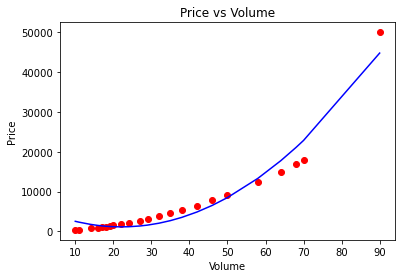

In [8]:
#visualizing the result
plt.scatter(x,y,color='red')
plt.plot(x, regressor.predict(x_poly), color='blue')
plt.title('Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

In [9]:
#Fitting polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg= PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(x)

regressor=LinearRegression()
regressor.fit(x_poly,y)

LinearRegression()

In [ ]:
#visualizing the result
plt.scatter(x,y,color='red')
plt.plot(x, regressor.predict(x_poly), color='blue')
plt.title('Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

In [ ]:
#Fitting polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg= PolynomialFeatures(degree=5)
x_poly=poly_reg.fit_transform(x)
regressor=LinearRegression()
regressor.fit(x_poly,y)

In [ ]:
# Polynomial Linear Regression – Step 3:
# visualizing the result
plt.scatter(x,y,color='red')
plt.plot(x, regressor.predict(x_poly), color='blue')
plt.title('Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show

In [ ]:
##visualizing the regression result(for higher resolution and smoother curve) 
x_grid = np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))

plt.scatter(x,y,color='red')
plt.plot(x_grid, regressor.predict(poly_reg.fit_transform(x_grid)), color='blue')
plt.title('Price vs Volume(polynomial regression) ')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

In [8]:
# #splitting the dataset into training and test sets
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [9]:
# # multiple linear regression - step 2 
# #Fitting simple linear regression to training set
# from sklearn.linear_model import LinearRegression
# regressor=LinearRegression()
# regressor.fit(x_train,y_train)
# print('Coefficients,beta:', regressor.coef_)
# print('Constant,alpha:', regressor.predict([[0,0,0,0]])) # y= mx1 + mx2 + mx3 + mx4 + c

Coefficients,beta: [-7.64437381e+03  6.21135973e-01  6.94950794e+00 -1.91570893e-01]
Constant,alpha: [-247075.19282106]


In [10]:
# #Predicting the results for test set
# y_pred=regressor.predict(x_test)
# print(y_pred) # predicted
# print(y_test) # actual

[469131.79514153 314305.95098855 177031.76224272 251333.22466428
 492265.59457446 384791.47672058 212333.02403266 223303.09210661
 451563.42840049 265608.51763769]
[466013 305250 188824 241206 495552 397289 222793 229567 438294 247841]


In [11]:
# #calculate the correlation coefficient
# corr=np.corrcoef(y_pred, y_test)
# print(corr)

[[1.         0.99542528]
 [0.99542528 1.        ]]


In [12]:
# from sklearn.metrics import mean_squared_error
# MSE = mean_squared_error(y_test, y_pred)
# print(MSE) # MSE to compare 2 model

114075328.33230333


In [10]:
y_predict=regressor.predict(poly_reg.fit_transform([[35],[80],[100]]))
print(y_predict)

[ 2724.87262355 32865.27308555 58572.2800645 ]
